In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_fraud = pd.read_csv('/aiffel/data/fraud.csv')

In [5]:
# 의미상 컬럼 삭제 
data_fraud.drop(['cc_num','first','last','trans_num','unix_time'], axis=1, inplace=True)
# cc_num 신용카드번호
# first 이름
# last 이름
# trans_num 거래번호
# unix_time 거래시간

data_fraud.drop(['street','city','state'], axis=1, inplace=True)
# street 카드 소유자 주소상 거리이름
# city 사는 도시
# state 사는 주

data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   merchant               491134 non-null  object 
 2   category               491134 non-null  object 
 3   amt                    491134 non-null  float64
 4   gender                 491134 non-null  object 
 5   zip                    491134 non-null  int64  
 6   lat                    491134 non-null  float64
 7   long                   491134 non-null  float64
 8   city_pop               491134 non-null  int64  
 9   job                    491134 non-null  object 
 10  dob                    491134 non-null  object 
 11  merch_lat              491134 non-null  float64
 12  merch_long             491134 non-null  float64
 13  is_fraud               491134 non-null  int64  
dtypes: float64(5), int64(3), object(6)
m

1. trans_date_trans_time: 거래가 발생한 날짜와 시간입니다. 거래의 타임스탬프를 의미합니다.
12. zip: 카드 소유자의 우편번호(Zip code)입니다.

13. lat: 카드 소유자의 거주지 위도 좌표입니다.
14. long: 카드 소유자의 거주지 경도 좌표입니다.

3. merchant: 거래가 이루어진 상점이나 판매자의 이름입니다.
보류
4. category: 거래의 유형을 나타내며, 거래가 어떤 범주에 속하는지(예: 레스토랑, 의류, 전자제품 등)를 설명합니다.
보류
5. amt: 거래 금액입니다. 해당 거래에서 지출된 금액을 나타냅니다.
사기칠라면 큰걸 치지 않을까
8. gender: 카드 소유자의 성별을 나타냅니다
사기 거래 비중으로 보기
카드 소유자의 거주 정보 중복 제거, 우편번호안에 담을 수 있다. 위도 경도는 상점이랑 거리 계산 가능할 거 같음.

---------------------------------------------------------------
15. city_pop: 카드 소유자가 거주하는 도시의 인구수입니다.
보류 도시의 인구가 많고 적은 것이 영향을 미칠 수도
16. job: 카드 소유자의 직업입니다.
보류 사기거래의 비중을 계산해보고 
17. dob: 카드 소유자의 생년월일입니다.
------------------------------------------------------------------------------------------------

20. merch_lat: 거래가 이루어진 상점의 위도 좌표입니다.
21. merch_long: 거래가 이루어진 상점의 경도 좌표입니다.
22. is_fraud: 해당 거래가 사기인지 여부를 나타내는 플래그입니다(1이면 사기, 0이면 정상 거래).

In [6]:
# trans_date_trans_time datetime으로 변경
from datetime import datetime
data_fraud['trans_date_trans_time'] = pd.to_datetime(data_fraud['trans_date_trans_time'])

In [7]:
# zip 우편번호 object 컬럼으로
data_fraud['zip'] = data_fraud['zip'].astype('str')

In [8]:
# dob에서 나이만 추출하기
#data_fraud['dob'] = data_fraud['dob'].str.split('-', expand=True)[0]

# dob과 거래일자로 성년인지 아닌지 피처 생성
data_fraud['dob'] = pd.to_datetime(data_fraud['dob'])

In [9]:
data_fraud['age'] = data_fraud['trans_date_trans_time'] - data_fraud['dob']

In [10]:
data_fraud['age'] = data_fraud['age'].dt.days

In [11]:
data_fraud['age'] = data_fraud['age'].apply(lambda x : 1 if x >= 6574 else 0)

In [12]:
data_fraud.rename({'age':'adult'}, axis=1, inplace=True)

In [13]:
data_fraud_real = data_fraud[data_fraud['is_fraud'] == 1]

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amt', ylabel='Density'>

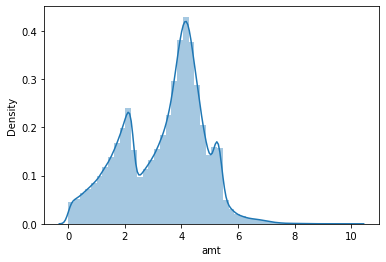

In [14]:
sns.distplot(np.log(data_fraud['amt']))

In [15]:
np.e**8

2980.957987041727

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amt', ylabel='Density'>

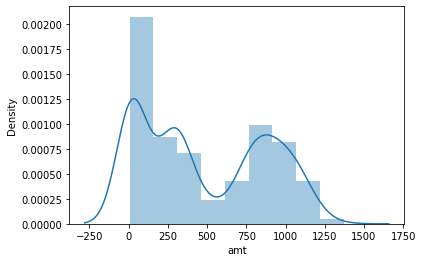

In [16]:
sns.distplot(data_fraud_real['amt'])

<AxesSubplot:ylabel='amt'>

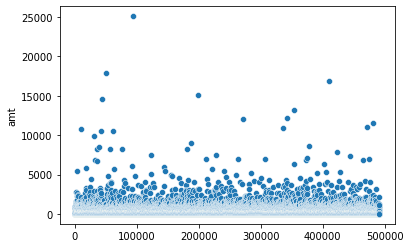

In [17]:
sns.scatterplot(x= data_fraud.index, y=data_fraud['amt'])

<AxesSubplot:ylabel='amt'>

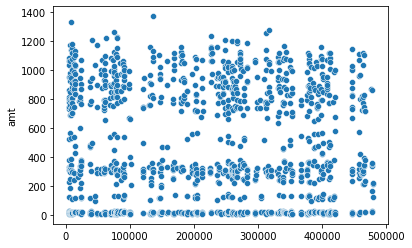

In [18]:
sns.scatterplot(x= data_fraud_real.index, y=data_fraud_real['amt'])

In [19]:
data_fraud_amt = data_fraud.amt

In [20]:
# 사기거래의 경우 최대 1400 으로 범위가 생각보다 작았다.
# 모든 거래의 데이터 중에 이상치들의 범위값을 제한한다. 3000으로
(data_fraud['amt'] >= 3000).sum()

154

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amt', ylabel='Density'>

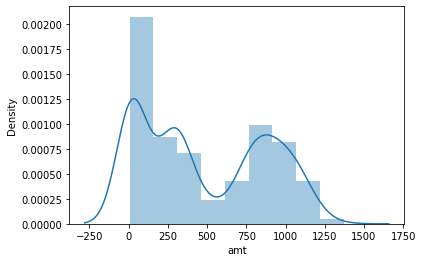

In [21]:
sns.distplot(data_fraud_real['amt'])

In [22]:
data_fraud['amt'] = data_fraud['amt'].apply(lambda x: 3000 if x > 3000 else x)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='city_pop', ylabel='Density'>

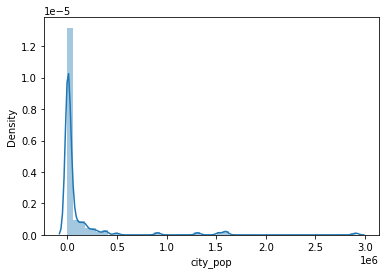

In [23]:
sns.distplot(data_fraud['city_pop'])

<AxesSubplot:ylabel='city_pop'>

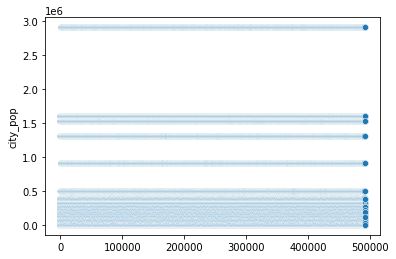

In [24]:
sns.scatterplot(x=data_fraud.index, y= data_fraud['city_pop'])

In [25]:
sorted(data_fraud['city_pop'].unique(), reverse=True)

[2906700,
 1595797,
 1526206,
 1312922,
 910148,
 493806,
 391389,
 378909,
 320420,
 276896,
 270712,
 238602,
 224256,
 190178,
 186140,
 172817,
 165556,
 163415,
 158701,
 134056,
 128715,
 124967,
 116001,
 105549,
 84106,
 76383,
 71485,
 71463,
 71335,
 54287,
 50835,
 50489,
 46563,
 34882,
 34496,
 34153,
 32891,
 31515,
 31394,
 28739,
 27971,
 21134,
 20478,
 20328,
 19685,
 19054,
 18408,
 18128,
 17867,
 16183,
 10076,
 9815,
 7646,
 7268,
 7155,
 6951,
 6841,
 6469,
 6120,
 6006,
 5895,
 5875,
 5760,
 5621,
 5512,
 5507,
 5196,
 5161,
 4575,
 4542,
 4090,
 4074,
 4056,
 3766,
 3684,
 3224,
 2872,
 2870,
 2607,
 2526,
 2408,
 2368,
 2135,
 1970,
 1847,
 1810,
 1789,
 1766,
 1725,
 1563,
 1523,
 1512,
 1423,
 1228,
 1089,
 922,
 895,
 888,
 878,
 836,
 765,
 743,
 725,
 722,
 718,
 647,
 606,
 564,
 372,
 343,
 328,
 313,
 242,
 241,
 217,
 149,
 136,
 111,
 85,
 77,
 69,
 46]

<AxesSubplot:ylabel='city_pop'>

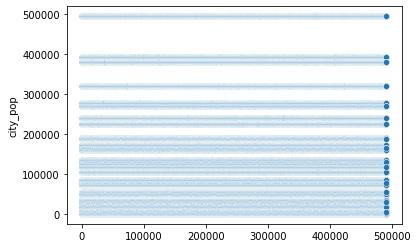

In [26]:
data_fraud_city = data_fraud[data_fraud['city_pop'] <= 493806]
sns.scatterplot(x=data_fraud_city.index, y= data_fraud_city['city_pop'])

In [27]:
# 도시 인구수로 도시 분류


In [28]:
# from math import radians, sin, cos, sqrt, atan2

# # 하버사인 거리 계산 함수
# def haversine(lat1, lon1, lat2, lon2):
#     R = 6371.0  # 지구 반지름 (킬로미터)
#     lat1_rad = radians(lat1)
#     lon1_rad = radians(lon1)
#     lat2_rad = radians(lat2)
#     lon2_rad = radians(lon2)
    
#     dlat = lat2_rad - lat1_rad
#     dlon = lon2_rad - lon1_rad
    
#     a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
#     distance = R * c
#     return distance

# data_fraud['distance_km'] = data_fraud.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

# sns.distplot(data_fraud['distance_km'])

# sns.distplot(data_fraud_real['distance_km'])

# data_fraud.drop(columns='distance_km', axis=1, inplace=True)

In [29]:
# 시간 피처 만들기
# hour피처에서 8시부터 새벽 시간대까지 사기거래가 몰려있다.
data_fraud['month'] = data_fraud['trans_date_trans_time'].dt.month
data_fraud['day'] = data_fraud['trans_date_trans_time'].dt.day
data_fraud['hour'] = data_fraud['trans_date_trans_time'].dt.hour

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trans_date_trans_time', ylabel='Density'>

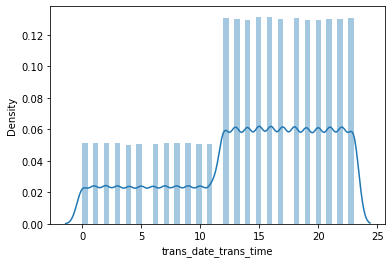

In [30]:
sns.distplot(data_fraud['trans_date_trans_time'].dt.hour)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trans_date_trans_time', ylabel='Density'>

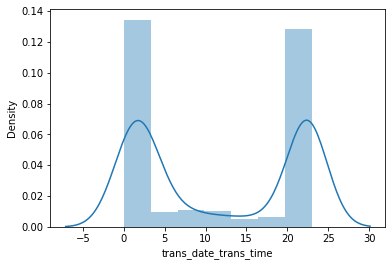

In [31]:
sns.distplot(data_fraud_real['trans_date_trans_time'].dt.hour)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trans_date_trans_time', ylabel='Density'>

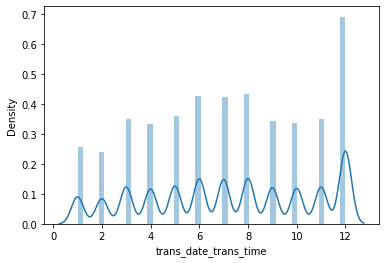

In [32]:
sns.distplot(data_fraud['trans_date_trans_time'].dt.month)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trans_date_trans_time', ylabel='Density'>

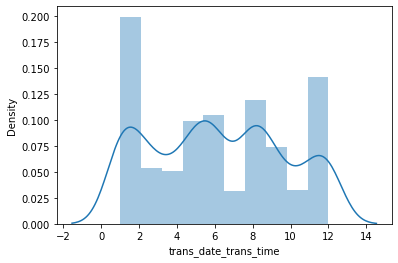

In [33]:
sns.distplot(data_fraud_real['trans_date_trans_time'].dt.month)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trans_date_trans_time', ylabel='Density'>

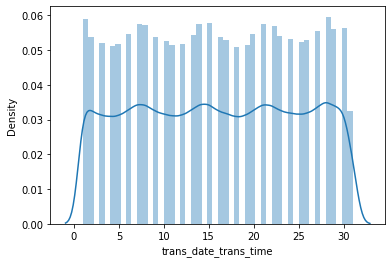

In [34]:
sns.distplot(data_fraud['trans_date_trans_time'].dt.day)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trans_date_trans_time', ylabel='Density'>

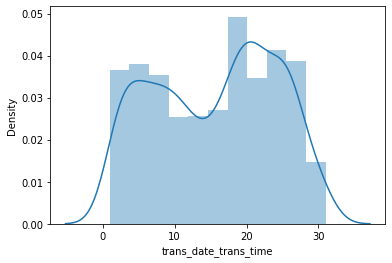

In [35]:
sns.distplot(data_fraud_real['trans_date_trans_time'].dt.day)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trans_date_trans_time', ylabel='Density'>

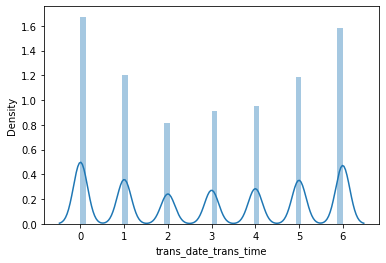

In [36]:
sns.distplot(data_fraud['trans_date_trans_time'].dt.weekday)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trans_date_trans_time', ylabel='Density'>

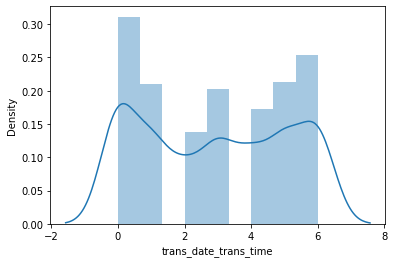

In [37]:
sns.distplot(data_fraud_real['trans_date_trans_time'].dt.weekday)

In [38]:
data_fraud['category'].unique()

array(['grocery_pos', 'grocery_net', 'misc_pos', 'gas_transport',
       'misc_net', 'health_fitness', 'travel', 'personal_care',
       'shopping_net', 'shopping_pos', 'home', 'entertainment',
       'food_dining', 'kids_pets'], dtype=object)

In [39]:
sorted(data_fraud_real['category'].unique())

['entertainment',
 'food_dining',
 'gas_transport',
 'grocery_net',
 'grocery_pos',
 'health_fitness',
 'home',
 'kids_pets',
 'misc_net',
 'misc_pos',
 'personal_care',
 'shopping_net',
 'shopping_pos',
 'travel']

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'entertainment'),
  Text(1, 0, 'food_dining'),
  Text(2, 0, 'gas_transport'),
  Text(3, 0, 'grocery_net'),
  Text(4, 0, 'grocery_pos'),
  Text(5, 0, 'health_fitness'),
  Text(6, 0, 'home'),
  Text(7, 0, 'kids_pets'),
  Text(8, 0, 'misc_net'),
  Text(9, 0, 'misc_pos'),
  Text(10, 0, 'personal_care'),
  Text(11, 0, 'shopping_net'),
  Text(12, 0, 'shopping_pos'),
  Text(13, 0, 'travel')])

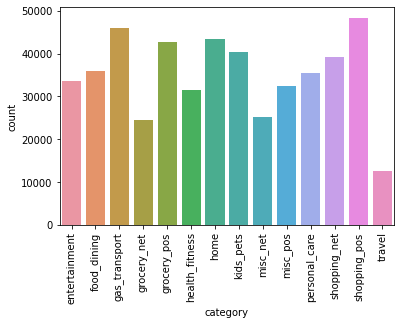

In [40]:
sns.countplot(data_fraud['category'], order = sorted(data_fraud['category'].unique()))
plt.xticks(rotation=90)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'entertainment'),
  Text(1, 0, 'food_dining'),
  Text(2, 0, 'gas_transport'),
  Text(3, 0, 'grocery_net'),
  Text(4, 0, 'grocery_pos'),
  Text(5, 0, 'health_fitness'),
  Text(6, 0, 'home'),
  Text(7, 0, 'kids_pets'),
  Text(8, 0, 'misc_net'),
  Text(9, 0, 'misc_pos'),
  Text(10, 0, 'personal_care'),
  Text(11, 0, 'shopping_net'),
  Text(12, 0, 'shopping_pos'),
  Text(13, 0, 'travel')])

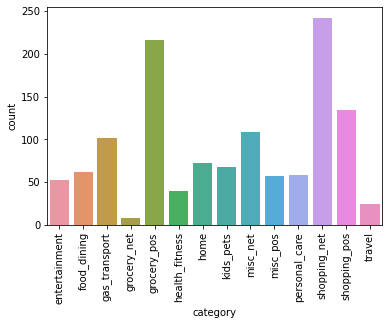

In [41]:
sns.countplot(data_fraud_real['category'], order = sorted(data_fraud['category'].unique()))
plt.xticks(rotation=90)

In [42]:
((data_fraud_real['category'].value_counts() / data_fraud['category'].value_counts()).sort_values()) * (1/0.03406969946986573)

grocery_net       0.009590
health_fitness    0.037373
entertainment     0.046272
personal_care     0.047937
home              0.048761
kids_pets         0.049532
food_dining       0.050578
misc_pos          0.051620
travel            0.055815
gas_transport     0.064405
shopping_pos      0.081355
misc_net          0.127063
grocery_pos       0.148400
shopping_net      0.181298
Name: category, dtype: float64

In [43]:
data_fraud['category'].value_counts()

shopping_pos      48345
gas_transport     46029
home              43340
grocery_pos       42722
kids_pets         40295
shopping_net      39179
food_dining       35980
personal_care     35513
entertainment     33619
misc_pos          32411
health_fitness    31415
misc_net          25179
grocery_net       24486
travel            12621
Name: category, dtype: int64

In [44]:
# gender가 얼마나 유의한지 시각적으로 확인하긴 힘들어보임.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

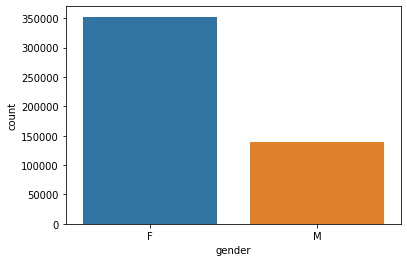

In [45]:
sns.countplot(data_fraud['gender'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

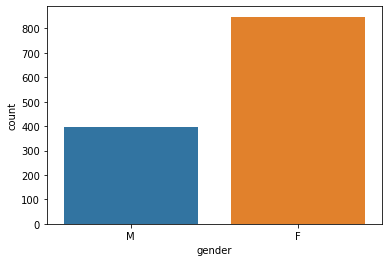

In [46]:
sns.countplot(data_fraud_real['gender'])

In [47]:
data_fraud['merchant'].nunique()

693

In [48]:
pd.Series(data_fraud['merchant'].unique()).head(30)

0                 fraud_Heller, Gutmann and Zieme
1               fraud_Schultz, Simonis and Little
2                               fraud_Kling-Grant
3                           fraud_Deckow-O'Conner
4                          fraud_Balistreri-Nader
5                           fraud_Heidenreich PLC
6                           fraud_Halvorson Group
7     fraud_Christiansen, Goyette and Schamberger
8                       fraud_Ledner-Pfannerstill
9                             fraud_Stracke-Lemke
10                           fraud_Huel-Langworth
11            fraud_Eichmann, Bogan and Rodriguez
12                 fraud_Huel, Hammes and Witting
13                        fraud_Jaskolski-Dibbert
14                             fraud_Cummings LLC
15                                 fraud_Howe Ltd
16                             fraud_Torp-Labadie
17                          fraud_VonRueden Group
18                          fraud_Brekke and Sons
19                            fraud_Padberg-Welch


In [49]:
data_fraud['merchant'].value_counts().sort_values().head(30)

fraud_Jerde-Hermann                      226
fraud_Reichert-Weissnat                  226
fraud_Satterfield-Lowe                   227
fraud_Douglas, DuBuque and McKenzie      228
fraud_Little-Gleichner                   228
fraud_Larson, Quitzon and Spencer        230
fraud_Champlin, Rolfson and Connelly     234
fraud_Ritchie, Bradtke and Stiedemann    234
fraud_Hodkiewicz, Prohaska and Paucek    237
fraud_Goyette-Herzog                     237
fraud_Medhurst, Labadie and Gottlieb     240
fraud_Eichmann, Hayes and Treutel        241
fraud_Ebert-Daugherty                    242
fraud_Tromp Group                        243
fraud_Treutel-King                       243
fraud_Schroeder, Wolff and Hermiston     243
fraud_Romaguera and Sons                 244
fraud_Ankunding-Carroll                  245
fraud_Kris-Kertzmann                     245
fraud_Kessler Inc                        247
fraud_Leannon-Nikolaus                   248
fraud_Kilback, Nitzsche and Leffler      248
fraud_Bedn

In [50]:
# merchant는 고윳값개수가 많은데 어떻게 묶을 지 모르겠다. 상점이나 판매자의 이름이 크게 의미가 있어보이지는 않음. 삭제
data_fraud.drop(columns = 'merchant', axis=1, inplace=True)

In [51]:
# 새로운 피처들이랑 중복되니 삭제
data_fraud.drop(columns = 'trans_date_trans_time', axis=1, inplace=True)

In [52]:
data_fraud['dob'] = data_fraud['dob'].dt.year

In [53]:
data_fraud_real = data_fraud_real = data_fraud[data_fraud['is_fraud'] == 1]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1971'),
  Text(2, 0, '1972'),
  Text(3, 0, '1973'),
  Text(4, 0, '1974'),
  Text(5, 0, '1975'),
  Text(6, 0, '1976'),
  Text(7, 0, '1977'),
  Text(8, 0, '1978'),
  Text(9, 0, '1979'),
  Text(10, 0, '1980'),
  Text(11, 0, '1981'),
  Text(12, 0, '1982'),
  Text(13, 0, '1983'),
  Text(14, 0, '1984'),
  Text(15, 0, '1985'),
  Text(16, 0, '1986'),
  Text(17, 0, '1987'),
  Text(18, 0, '1988'),
  Text(19, 0, '1989'),
  Text(20, 0, '1990'),
  Text(21, 0, '1991'),
  Text(22, 0, '1992'),
  Text(23, 0, '1993'),
  Text(24, 0, '1994'),
  Text(25, 0, '1995'),
  Text(26, 0, '1996'),
  Text(27, 0, '1997'),
  Text(28, 0, '1998'),
  Text(29, 0, '1999'),
  Text(30, 0, '2000'),
  Text(31, 0, '2003'),
  Text(32, 0, '2004')])

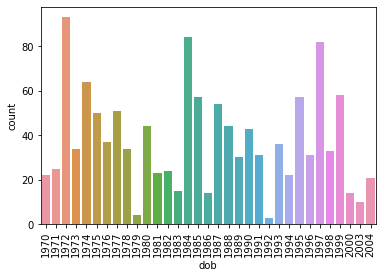

In [54]:
sns.countplot(data_fraud_real['dob'], order = sorted(data_fraud_real['dob'].unique()))
plt.xticks(rotation=90)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1971'),
  Text(2, 0, '1972'),
  Text(3, 0, '1973'),
  Text(4, 0, '1974'),
  Text(5, 0, '1975'),
  Text(6, 0, '1976'),
  Text(7, 0, '1977'),
  Text(8, 0, '1978'),
  Text(9, 0, '1979'),
  Text(10, 0, '1980'),
  Text(11, 0, '1981'),
  Text(12, 0, '1982'),
  Text(13, 0, '1983'),
  Text(14, 0, '1984'),
  Text(15, 0, '1985'),
  Text(16, 0, '1986'),
  Text(17, 0, '1987'),
  Text(18, 0, '1988'),
  Text(19, 0, '1989'),
  Text(20, 0, '1990'),
  Text(21, 0, '1991'),
  Text(22, 0, '1992'),
  Text(23, 0, '1993'),
  Text(24, 0, '1994'),
  Text(25, 0, '1995'),
  Text(26, 0, '1996'),
  Text(27, 0, '1997'),
  Text(28, 0, '1998'),
  Text(29, 0, '1999'),
  Text(30, 0, '2000'),
  Text(31, 0, '2003'),
  Text(32, 0, '2004')])

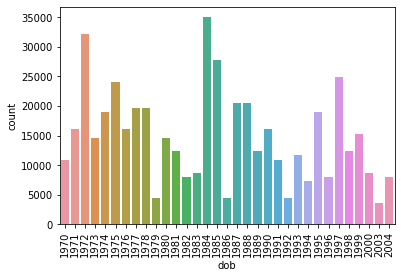

In [55]:
sns.countplot(data_fraud['dob'], order = sorted(data_fraud_real['dob'].unique()))
plt.xticks(rotation=90)

In [56]:
correlation_matrix = data_fraud.corr()

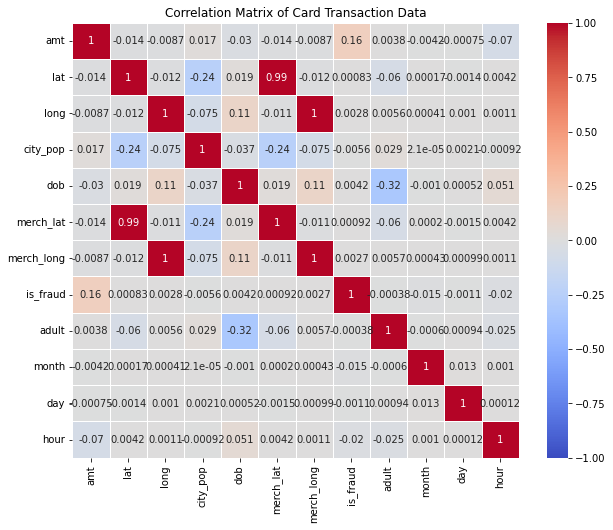

In [57]:
# 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Card Transaction Data')
plt.show()

In [58]:
data_fraud['adult'] = data_fraud['adult'].astype('str')
data_fraud['month'] = data_fraud['month'].astype('str')
data_fraud['day'] = data_fraud['day'].astype('str')
data_fraud['hour'] = data_fraud['hour'].astype('str')

In [59]:
data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    491134 non-null  object 
 1   amt         491134 non-null  float64
 2   gender      491134 non-null  object 
 3   zip         491134 non-null  object 
 4   lat         491134 non-null  float64
 5   long        491134 non-null  float64
 6   city_pop    491134 non-null  int64  
 7   job         491134 non-null  object 
 8   dob         491134 non-null  int64  
 9   merch_lat   491134 non-null  float64
 10  merch_long  491134 non-null  float64
 11  is_fraud    491134 non-null  int64  
 12  adult       491134 non-null  object 
 13  month       491134 non-null  object 
 14  day         491134 non-null  object 
 15  hour        491134 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 60.0+ MB


In [60]:
data_fraud['category']

0           grocery_pos
1           grocery_pos
2           grocery_net
3           grocery_pos
4              misc_pos
              ...      
491129             home
491130     shopping_pos
491131        kids_pets
491132        kids_pets
491133    entertainment
Name: category, Length: 491134, dtype: object

In [61]:
data_fraud['amt_1500_under'] = data_fraud['amt'].apply(lambda x: 1 if x < 1500 else 0)

In [62]:
data_fraud.zip.nunique()

124

In [63]:
data_fraud['amt_1500_under'].value_counts()
data_fraud.drop(columns='amt_1500_under', axis=1 , inplace=True)

In [64]:
data_fraud_real.job.value_counts().head(30)

Environmental consultant                             29
Surveyor, land/geomatics                             28
Comptroller                                          26
Immunologist                                         25
Historic buildings inspector/conservation officer    24
Paramedic                                            21
Exhibition designer                                  20
Film/video editor                                    19
Television production assistant                      19
Chief Executive Officer                              19
Energy manager                                       18
Musician                                             18
Materials engineer                                   17
Research scientist (physical sciences)               16
Engineer, electronics                                16
Futures trader                                       16
Engineer, control and instrumentation                16
Secondary school teacher                        

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='count'>

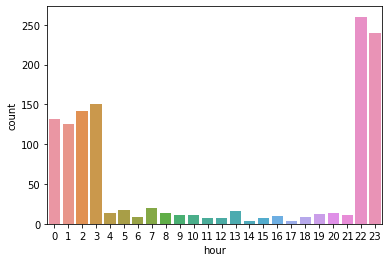

In [65]:
sns.countplot(data_fraud_real.hour)

In [66]:
data_fraud['hour'] = data_fraud['hour'].apply(lambda x: '22-23' if x in ['22','23'] else '0-3' if x in ['0','1','2','3']else '4-21')

In [67]:
data_fraud_real = data_fraud_real = data_fraud[data_fraud['is_fraud'] == 1]

In [68]:
data_fraud[data_fraud['amt'] < 200]

,category,amt,gender,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,adult,month,day,hour
0,grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1978,49.159047,-118.186462,0,1,1,1,0-3
1,grocery_pos,44.71,M,7208,40.6747,-74.2239,124967,Operational researcher,1980,40.079588,-74.848087,0,1,1,1,0-3
2,grocery_net,46.28,F,7060,40.6152,-74.4150,71485,Leisure centre manager,1974,40.021888,-74.228188,0,1,1,1,0-3
3,grocery_pos,64.09,M,48174,42.2203,-83.3583,31515,Police officer,1971,42.360426,-83.552316,0,1,1,1,0-3
4,misc_pos,25.58,F,70808,30.4066,-91.1468,378909,"Designer, furniture",1977,29.737426,-90.853194,0,1,1,1,0-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,home,134.26,F,28405,34.2651,-77.8670,186140,English as a second language teacher,1983,34.853497,-78.664158,0,1,12,31,22-23
491130,shopping_pos,25.49,F,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984,35.008839,-81.475156,0,1,12,31,22-23
491131,kids_pets,111.84,M,77566,29.0393,-95.4401,28739,Futures trader,1999,29.661049,-96.186633,0,1,12,31,22-23
491132,kids_pets,86.88,F,99323,46.1966,-118.9017,3684,Musician,1981,46.658340,-119.715054,0,1,12,31,22-23


In [69]:
data_fraud[data_fraud['amt'] < 200]

,category,amt,gender,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,adult,month,day,hour
0,grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1978,49.159047,-118.186462,0,1,1,1,0-3
1,grocery_pos,44.71,M,7208,40.6747,-74.2239,124967,Operational researcher,1980,40.079588,-74.848087,0,1,1,1,0-3
2,grocery_net,46.28,F,7060,40.6152,-74.4150,71485,Leisure centre manager,1974,40.021888,-74.228188,0,1,1,1,0-3
3,grocery_pos,64.09,M,48174,42.2203,-83.3583,31515,Police officer,1971,42.360426,-83.552316,0,1,1,1,0-3
4,misc_pos,25.58,F,70808,30.4066,-91.1468,378909,"Designer, furniture",1977,29.737426,-90.853194,0,1,1,1,0-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,home,134.26,F,28405,34.2651,-77.8670,186140,English as a second language teacher,1983,34.853497,-78.664158,0,1,12,31,22-23
491130,shopping_pos,25.49,F,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984,35.008839,-81.475156,0,1,12,31,22-23
491131,kids_pets,111.84,M,77566,29.0393,-95.4401,28739,Futures trader,1999,29.661049,-96.186633,0,1,12,31,22-23
491132,kids_pets,86.88,F,99323,46.1966,-118.9017,3684,Musician,1981,46.658340,-119.715054,0,1,12,31,22-23


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amt', ylabel='Density'>

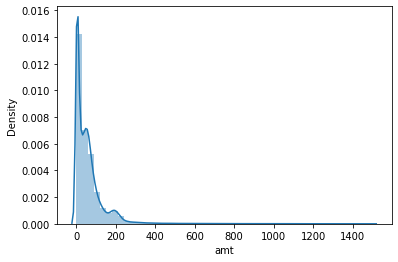

In [70]:
sns.distplot(data_fraud[data_fraud['amt'] < 1500]['amt'])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amt', ylabel='Density'>

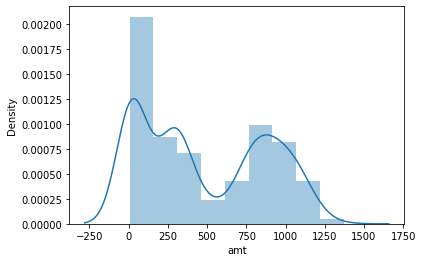

In [71]:
sns.distplot(data_fraud_real[data_fraud_real['amt'] < 1500]['amt'])

In [72]:
# 거래 전체를 보면 200이하의 값들이 대부분인데.
# 사기 거래를 보면 0부터 거래전체의 빈도를 따르다가 . 500부터 다시 올라간다.
# 거래의 액수가 클수록 사기거래일 가능성이 높아진다. 1500이상의 값들은 이상치로.
# 0~ 500 500~1500 others로 나누기
data_fraud['amt_new'] = data_fraud['amt'].apply(lambda x: '0-500' if x < 500 else '500-1500'if x < 1500 else 'others')

In [73]:
data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    491134 non-null  object 
 1   amt         491134 non-null  float64
 2   gender      491134 non-null  object 
 3   zip         491134 non-null  object 
 4   lat         491134 non-null  float64
 5   long        491134 non-null  float64
 6   city_pop    491134 non-null  int64  
 7   job         491134 non-null  object 
 8   dob         491134 non-null  int64  
 9   merch_lat   491134 non-null  float64
 10  merch_long  491134 non-null  float64
 11  is_fraud    491134 non-null  int64  
 12  adult       491134 non-null  object 
 13  month       491134 non-null  object 
 14  day         491134 non-null  object 
 15  hour        491134 non-null  object 
 16  amt_new     491134 non-null  object 
dtypes: float64(5), int64(3), object(9)
memory usage: 63.7+ MB


In [74]:
data_fraud.zip.value_counts()

16114    4392
61454    4392
89512    4386
84540    4386
72476    4386
         ... 
83646    3641
26041    3638
28073    3638
70726    3638
35811    3628
Name: zip, Length: 124, dtype: int64

In [75]:
data_fraud

,category,amt,gender,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,adult,month,day,hour,amt_new
0,grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1978,49.159047,-118.186462,0,1,1,1,0-3,0-500
1,grocery_pos,44.71,M,7208,40.6747,-74.2239,124967,Operational researcher,1980,40.079588,-74.848087,0,1,1,1,0-3,0-500
2,grocery_net,46.28,F,7060,40.6152,-74.4150,71485,Leisure centre manager,1974,40.021888,-74.228188,0,1,1,1,0-3,0-500
3,grocery_pos,64.09,M,48174,42.2203,-83.3583,31515,Police officer,1971,42.360426,-83.552316,0,1,1,1,0-3,0-500
4,misc_pos,25.58,F,70808,30.4066,-91.1468,378909,"Designer, furniture",1977,29.737426,-90.853194,0,1,1,1,0-3,0-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,home,134.26,F,28405,34.2651,-77.8670,186140,English as a second language teacher,1983,34.853497,-78.664158,0,1,12,31,22-23,0-500
491130,shopping_pos,25.49,F,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984,35.008839,-81.475156,0,1,12,31,22-23,0-500
491131,kids_pets,111.84,M,77566,29.0393,-95.4401,28739,Futures trader,1999,29.661049,-96.186633,0,1,12,31,22-23,0-500
491132,kids_pets,86.88,F,99323,46.1966,-118.9017,3684,Musician,1981,46.658340,-119.715054,0,1,12,31,22-23,0-500


In [76]:
data_fraud['job']

0              Special educational needs teacher
1                         Operational researcher
2                         Leisure centre manager
3                                 Police officer
4                            Designer, furniture
                           ...                  
491129      English as a second language teacher
491130    Research scientist (physical sciences)
491131                            Futures trader
491132                                  Musician
491133                               Media buyer
Name: job, Length: 491134, dtype: object

In [82]:
#
data_fraud.drop(columns = ['lat','long'],axis=1,inplace=True)

KeyError: "['lat' 'long'] not found in axis"

In [84]:
data_fraud.drop(columns = ['zip','job','dob'],axis=1,inplace=True)

In [85]:
data_fraud

,category,amt,gender,city_pop,merch_lat,merch_long,is_fraud,adult,month,day,hour,amt_new
0,grocery_pos,107.23,F,149,49.159047,-118.186462,0,1,1,1,0-3,0-500
1,grocery_pos,44.71,M,124967,40.079588,-74.848087,0,1,1,1,0-3,0-500
2,grocery_net,46.28,F,71485,40.021888,-74.228188,0,1,1,1,0-3,0-500
3,grocery_pos,64.09,M,31515,42.360426,-83.552316,0,1,1,1,0-3,0-500
4,misc_pos,25.58,F,378909,29.737426,-90.853194,0,1,1,1,0-3,0-500
...,...,...,...,...,...,...,...,...,...,...,...,...
491129,home,134.26,F,186140,34.853497,-78.664158,0,1,12,31,22-23,0-500
491130,shopping_pos,25.49,F,1523,35.008839,-81.475156,0,1,12,31,22-23,0-500
491131,kids_pets,111.84,M,28739,29.661049,-96.186633,0,1,12,31,22-23,0-500
491132,kids_pets,86.88,F,3684,46.658340,-119.715054,0,1,12,31,22-23,0-500


In [86]:
data_fraud_x = data_fraud.drop(columns = 'is_fraud' , axis=1)

In [87]:
data_fraud_x = pd.get_dummies(data_fraud_x, columns=['category','gender','adult','month','day','hour','amt_new'], drop_first =True,)

In [88]:
data_fraud_x

,amt,city_pop,merch_lat,merch_long,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,day_4,day_5,day_6,day_7,day_8,day_9,hour_22-23,hour_4-21,amt_new_500-1500,amt_new_others
0,107.23,149,49.159047,-118.186462,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44.71,124967,40.079588,-74.848087,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,46.28,71485,40.021888,-74.228188,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,64.09,31515,42.360426,-83.552316,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25.58,378909,29.737426,-90.853194,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,134.26,186140,34.853497,-78.664158,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
491130,25.49,1523,35.008839,-81.475156,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
491131,111.84,28739,29.661049,-96.186633,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
491132,86.88,3684,46.658340,-119.715054,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
ss = StandardScaler()

In [91]:
ss.fit(data_fraud_x)

StandardScaler()

In [92]:
ss.transform(data_fraud_x)

array([[ 0.30431674, -0.32541987,  2.08985968, ..., -1.91537539,
        -0.09503448, -0.03603724],
       [-0.18462368,  0.00959477,  0.40002309, ..., -1.91537539,
        -0.09503448, -0.03603724],
       [-0.17234543, -0.13395226,  0.38928418, ..., -1.91537539,
        -0.09503448, -0.03603724],
       ...,
       [ 0.34036945, -0.24868359, -1.53903829, ..., -1.91537539,
        -0.09503448, -0.03603724],
       [ 0.14516867, -0.31593184,  1.62443699, ..., -1.91537539,
        -0.09503448, -0.03603724],
       [-0.23608286, -0.0144702 , -0.32015279, ..., -1.91537539,
        -0.09503448, -0.03603724]])

In [103]:
ss_df = pd.DataFrame(ss.transform(data_fraud_x), columns = data_fraud_x.columns)
ss_df

,amt,city_pop,merch_lat,merch_long,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,day_4,day_5,day_6,day_7,day_8,day_9,hour_22-23,hour_4-21,amt_new_500-1500,amt_new_others
0,0.304317,-0.325420,2.089860,-2.129411,-0.281159,-0.321577,-0.229068,3.239760,-0.26141,-0.311104,...,-0.178194,-0.17874,-0.18385,-0.18925,-0.18862,-0.182693,-0.369313,-1.915375,-0.095034,-0.036037
1,-0.184624,0.009595,0.400023,1.203262,-0.281159,-0.321577,-0.229068,3.239760,-0.26141,-0.311104,...,-0.178194,-0.17874,-0.18385,-0.18925,-0.18862,-0.182693,-0.369313,-1.915375,-0.095034,-0.036037
2,-0.172345,-0.133952,0.389284,1.250932,-0.281159,-0.321577,4.365518,-0.308665,-0.26141,-0.311104,...,-0.178194,-0.17874,-0.18385,-0.18925,-0.18862,-0.182693,-0.369313,-1.915375,-0.095034,-0.036037
3,-0.033062,-0.241233,0.824525,0.533916,-0.281159,-0.321577,-0.229068,3.239760,-0.26141,-0.311104,...,-0.178194,-0.17874,-0.18385,-0.18925,-0.18862,-0.182693,-0.369313,-1.915375,-0.095034,-0.036037
4,-0.334231,0.691181,-1.524823,-0.027513,-0.281159,-0.321577,-0.229068,-0.308665,-0.26141,-0.311104,...,-0.178194,-0.17874,-0.18385,-0.18925,-0.18862,-0.182693,-0.369313,-1.915375,-0.095034,-0.036037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,0.515706,0.173785,-0.572638,0.909810,-0.281159,-0.321577,-0.229068,-0.308665,-0.26141,3.214361,...,-0.178194,-0.17874,-0.18385,-0.18925,-0.18862,-0.182693,2.707728,-1.915375,-0.095034,-0.036037
491130,-0.334935,-0.321732,-0.543727,0.693648,-0.281159,-0.321577,-0.229068,-0.308665,-0.26141,-0.311104,...,-0.178194,-0.17874,-0.18385,-0.18925,-0.18862,-0.182693,2.707728,-1.915375,-0.095034,-0.036037
491131,0.340369,-0.248684,-1.539038,-0.437649,-0.281159,-0.321577,-0.229068,-0.308665,-0.26141,-0.311104,...,-0.178194,-0.17874,-0.18385,-0.18925,-0.18862,-0.182693,2.707728,-1.915375,-0.095034,-0.036037
491132,0.145169,-0.315932,1.624437,-2.246958,-0.281159,-0.321577,-0.229068,-0.308665,-0.26141,-0.311104,...,-0.178194,-0.17874,-0.18385,-0.18925,-0.18862,-0.182693,2.707728,-1.915375,-0.095034,-0.036037


In [ ]:
# from sklearn.decomposition import PCA

# pca= PCA(2)

# pca.fit(data_fraud_x)

# pca.explained_variance_ratio_